# Expected Value of a Slot Machine

A slot machine with, in this example 3 slots and 4 different symbols can have 64 (4 x 4 x 4) different combinations. The number of combinations in today's slots is somewhat higher. For example 5 slots with 30 symbols each, has a total of combinations of 243,000,000.

In [1]:
symbols = [1, 2, 3, 4]
spins = [1, 2, 3]

In [2]:
def total_combinations(symbols: list, spins: list) -> int:
    """ Calculates all possible combinations
    :param symbols: list of different symbols
    :param spins: list that represents the number of slots
    """
    result = 0
    for i, spin in enumerate(spins):
        if i == 0:
            result = len(symbols)
        else:
            result = result * len(symbols)
    return result

In [3]:
print("Number of possible combinations are", total_combinations(symbols, spins))

Number of possible combinations are 64


Possible winning combinations in this example are straight forward:<br/>
1. Three same symbols win 50 coins<br/>
2. Two same symbols win of 10 coins<br/>

In [4]:
import random

def spin(symbols: list, spins: list, x:float, y:float) -> float:
    """ One slot machine spin
    :param symbols: list of different symbols
    :param spins: list that represents the number of slots
    """
    result = []
    for spin in spins:
        result.append(random.choice(symbols))
    if(len(set(result)) < 3):
        if(len(set(result)) < 2):
            return(x)
        else:
            return(y)
    else:
        return(0)

In [5]:
spin(symbols, spins, 50, 10)

10

The number of winning combinations are:<br/>
1. For each spinning slot with three times the same pairs gives 4 combinations.<br/>
2. The second combination requires 2 times the same symbol on any slot 4 times (1 x 1 x 4) + (1 x 4 x 1) + (4 x 1 x 1) = 36 combinations.

In [6]:
import itertools

def winning_combinations(symbols: list, spins: list, n_same_symbols:int) -> int:
    """ Calculates the number of combinations.
    :param symbols: list of different symbols
    :param spins: list that represents the number of slots
    :param n_same_symbols: target number of same symbols that are of interest
    """
    combinations = 0
    for p in [p for p in itertools.product(symbols, repeat=3)]: # looping through all possible combinations
        p = list(p)
        p.sort()
        counts = [len(list(group)) for key, group in itertools.groupby(p)]
        if max(counts) == n_same_symbols:
            combinations += 1
    
    return combinations

In [7]:
print("Total possible combinations are:", winning_combinations(symbols, spins, 2) + winning_combinations(symbols, spins, 3))
print("Probability to hit two times the same symbol:", winning_combinations(symbols, spins, 2) / total_combinations(symbols, spins) * 100)
print("Probability to hit three times the same symbol:", winning_combinations(symbols, spins, 3) / total_combinations(symbols, spins) * 100)

Total possible combinations are: 40
Probability to hit two times the same symbol: 56.25
Probability to hit three times the same symbol: 6.25


The probability to win can be calculated by:<br/>
*winning combinations / total combinations*<br/>
(4 + 36) / 64 = 62.5 %

In [8]:
(winning_combinations(symbols, spins, 2) + winning_combinations(symbols, spins, 3)) / total_combinations(symbols, spins) * 100

62.5

The expected value is: <br/>
sum of winnings by amount x combinations / total combinations as on this example one spin costs 1 coin.<br/>
4/64 * 50 + 36/64 * 10 = 8.75

In [9]:
def expected_value(x:float, y:float) -> float:
    """ Calculates the expected value for the slot machine.
    :param x: Payout for 3 times the same symbol.
    :param y: Payout for 2 times the same symbol.
    """
    e = 4/64 * x + 36/64 * y
    return e

In [10]:
expected_value(50, 10)

8.75

In [11]:
(winning_combinations(symbols, spins, 3) * 50 + winning_combinations(symbols, spins, 2) * 10) / total_combinations(symbols, spins)

8.75

In [12]:
simulation = 0
for i in range(10000):
    simulation += spin(symbols, spins, 50, 10)
print(simulation)

88700


The payout in this context is defined as: <br/>
*payout = expected value - cost*<br/>
It describes what you will earn in the long run by including the cost of one spin.<br/>
On this example the payout is at:<br/> 
*8.75 - 1 = 7.75*

In [46]:
simulation = 0
for i in range(10000):
    simulation += spin(symbols, spins, 50, 10)
    simulation -= 1
print(simulation)

77890


A slot machine with a payout of 7.75 is not economically sustainable as you might imagine. So let's improve the payout by calculating the fair game. A fair game is defined as:<br/>
*payout = expected value - costs = 0*

As the cost per spin is by 1, the fair game equation is:<br/>
*4/64 * x + 36/64 * y = 1*<br/>
On the equation above it's easy to see that the two zeropoints at 16 for x and 16/9 for y.<br/>
Converting the formula to y gives:<br/>
*y =  1/9 * x - 16/9*

Text(0, 0.5, 'y = Payout for 2 same symbols')

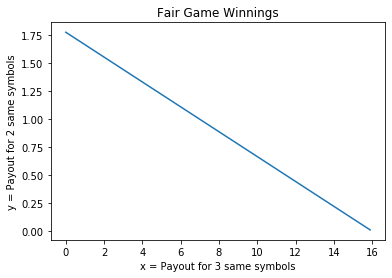

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 16, 0.1)
y = np.array([fair_game(xi) for xi in x])
plt.plot(x, y)
plt.title('Fair Game Winnings')
plt.xlabel('x = Payout for 3 same symbols')
plt.ylabel('y = Payout for 2 same symbols')

In [62]:
def fair_game(x: float) -> float:
    """ Returns the winning amount for the second combination with a given winning amount for the first combination.
    :param x: Winning amount for three times the same symbol
    """
    y = -1/9 * x + 16/9
    return y

In [63]:
x = 5
fair_game(x)

1.222222222222222

In [115]:
simulation = 0
for i in range(10000):
    simulation += spin(symbols, spins, x, fair_game(x))
    simulation -= 1
print(simulation)

63.55555555558442


The payout 